In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
import klib as k

In [2]:
data=pd.read_csv('./salary.csv')


In [3]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
data.duplicated().sum()

24

In [5]:
## drop duplicated values

In [6]:
data.drop_duplicates(inplace=True)

In [7]:
data.isnull().mean()*100

age               0.0
workclass         0.0
fnlwgt            0.0
education         0.0
education-num     0.0
marital-status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
capital-gain      0.0
capital-loss      0.0
hours-per-week    0.0
native-country    0.0
salary            0.0
dtype: float64

In [8]:
data.shape

(32537, 15)

In [9]:
data.sample(50)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
22301,42,State-gov,148316,Assoc-voc,11,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
1977,35,Private,343403,Some-college,10,Never-married,Sales,Not-in-family,White,Female,0,0,40,United-States,<=50K
18067,27,Private,150080,Bachelors,13,Never-married,Exec-managerial,Own-child,White,Female,0,0,40,United-States,<=50K
23762,31,Private,254293,Some-college,10,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,40,United-States,<=50K
30950,45,State-gov,154117,HS-grad,9,Divorced,Exec-managerial,Unmarried,White,Female,0,0,38,United-States,>50K
2961,68,?,133758,7th-8th,4,Widowed,?,Not-in-family,Black,Male,0,0,10,United-States,<=50K
14517,43,Self-emp-not-inc,32451,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
17343,38,Private,436361,HS-grad,9,Divorced,Other-service,Not-in-family,White,Female,0,0,75,United-States,<=50K
4880,37,Private,30267,11th,7,Never-married,Transport-moving,Not-in-family,White,Male,0,0,60,United-States,>50K
12018,45,Private,178319,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,7688,0,50,United-States,>50K


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education-num   32537 non-null  int64 
 5   marital-status  32537 non-null  object
 6   occupation      32537 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital-gain    32537 non-null  int64 
 11  capital-loss    32537 non-null  int64 
 12  hours-per-week  32537 non-null  int64 
 13  native-country  32537 non-null  object
 14  salary          32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [11]:
## droping un necessary colomns
data.drop(columns='fnlwgt',inplace=True)

## univariate analysis

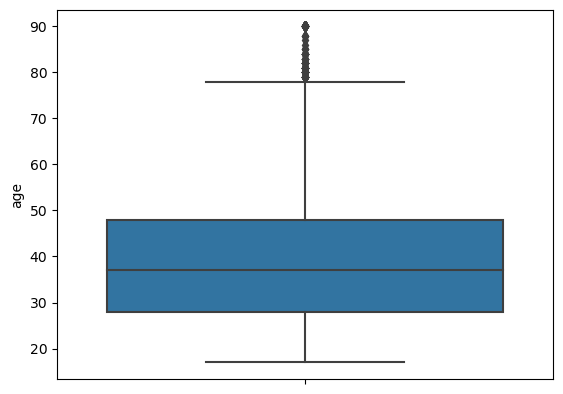

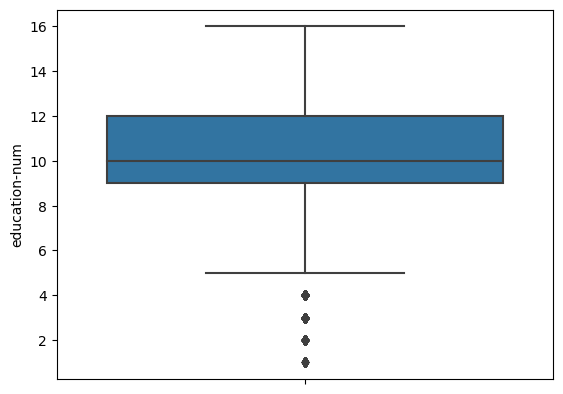

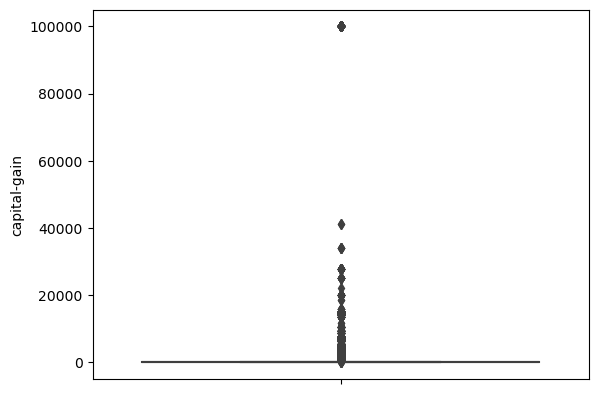

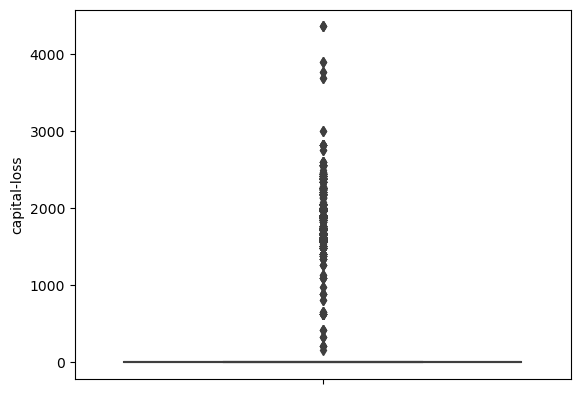

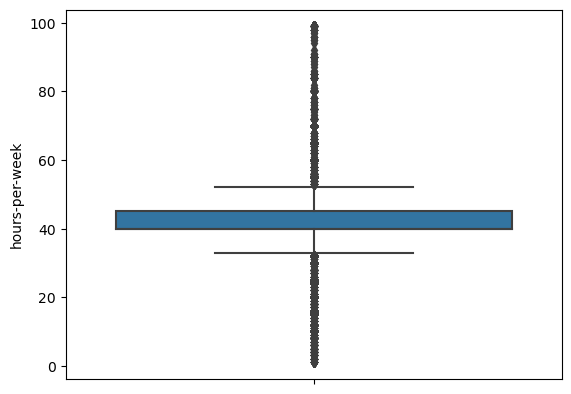

In [12]:
for i in data.columns:
    if data[i].dtype!='object':
        sns.boxplot(y=data[i])
        plt.show()

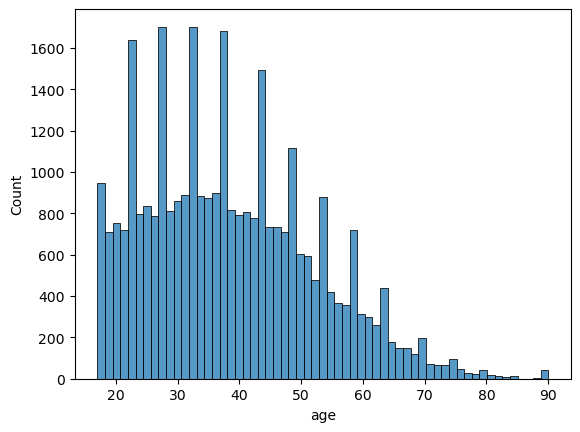

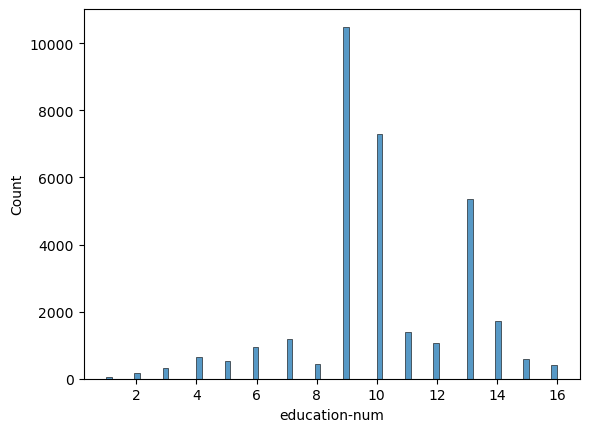

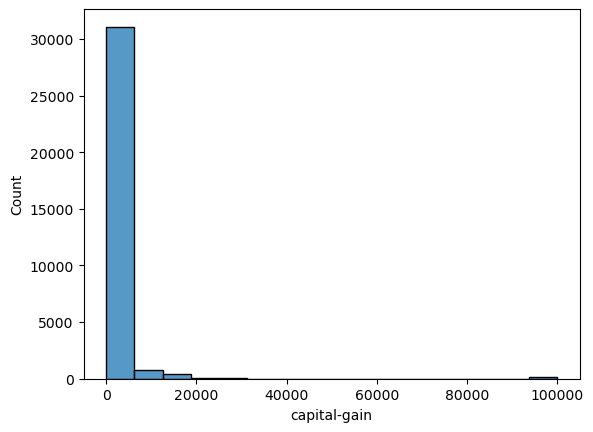

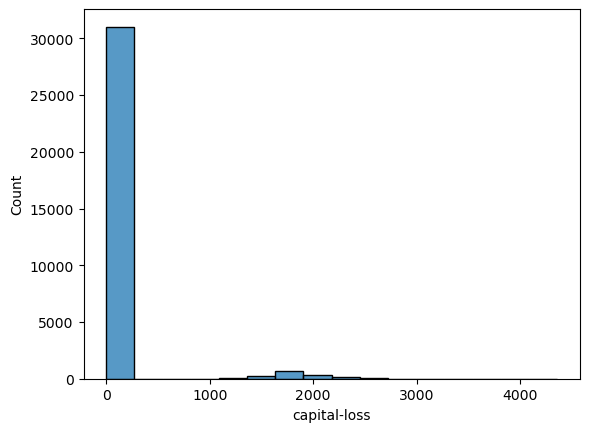

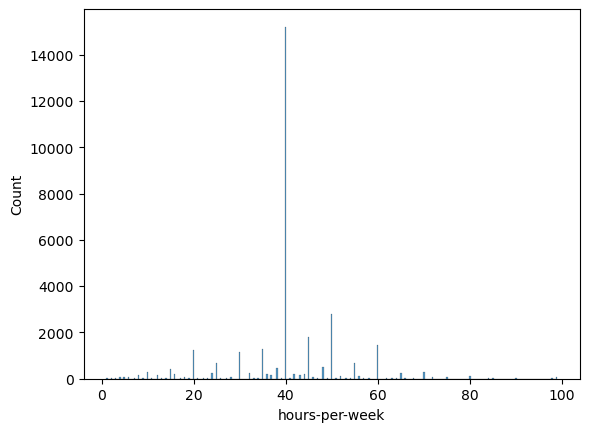

In [13]:
for i in data.columns:
    if data[i].dtype!='object':
        sns.histplot(x=data[i])
        plt.show()

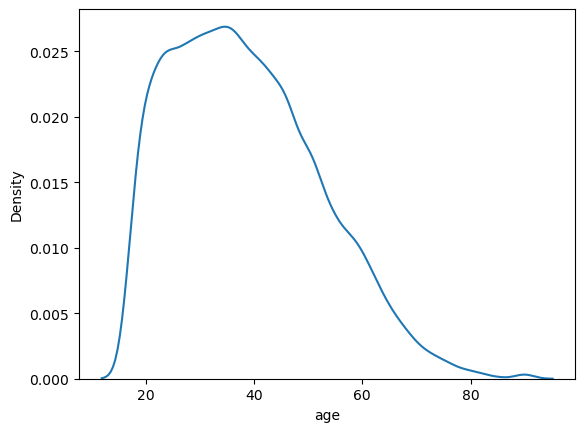

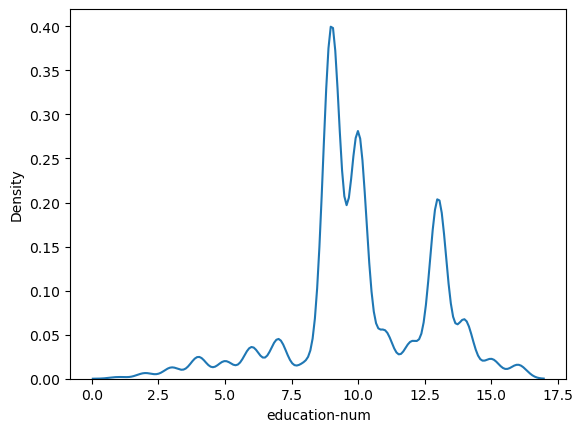

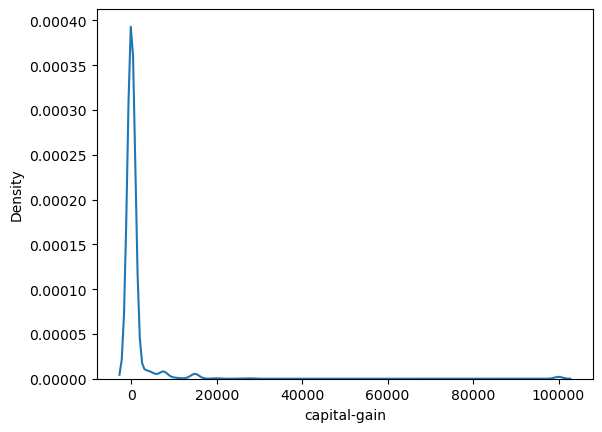

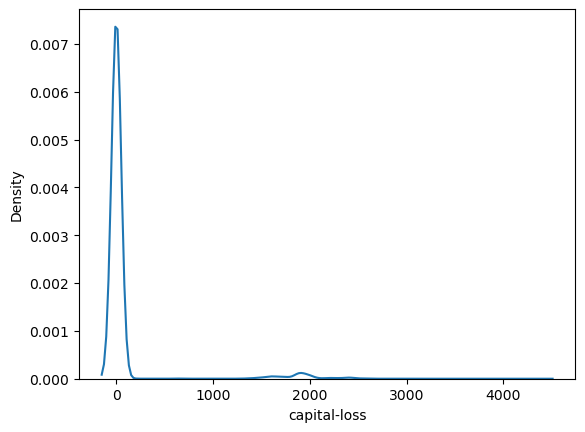

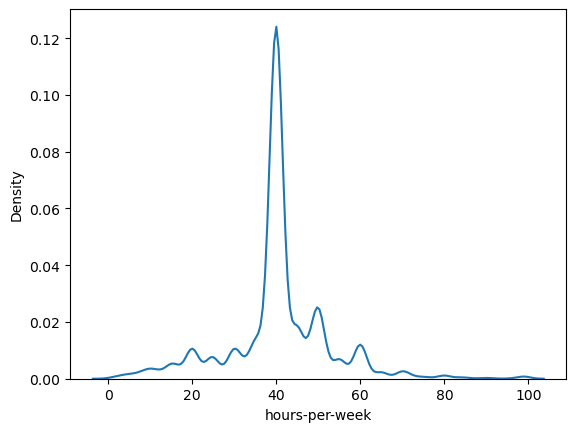

In [14]:
for i in data.columns:
    if data[i].dtype!='object':
        sns.kdeplot(x=data[i])
        plt.show()

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


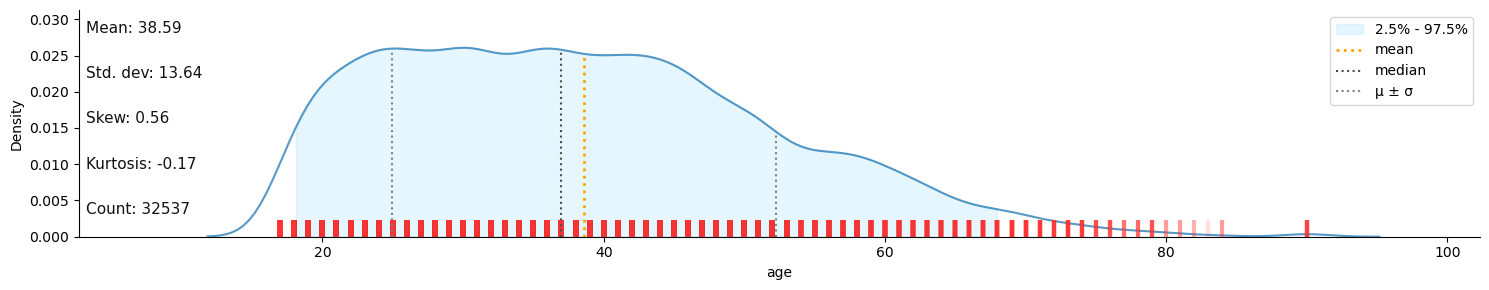

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


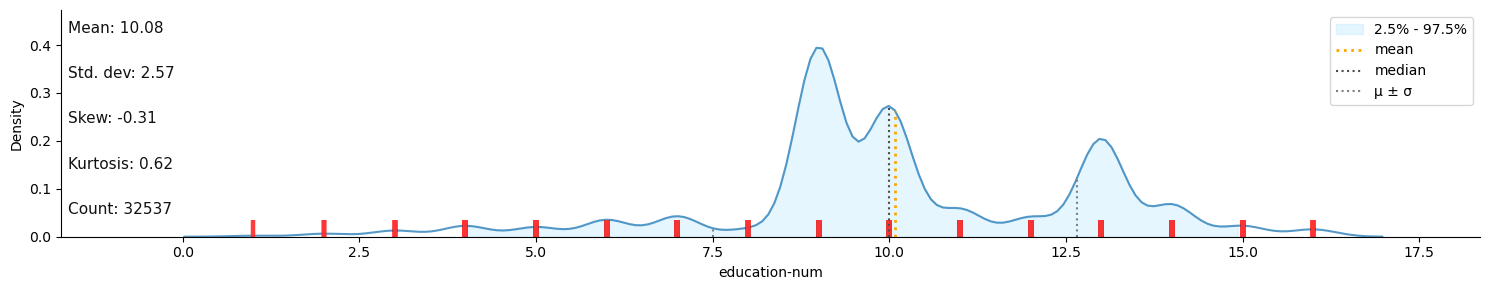

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


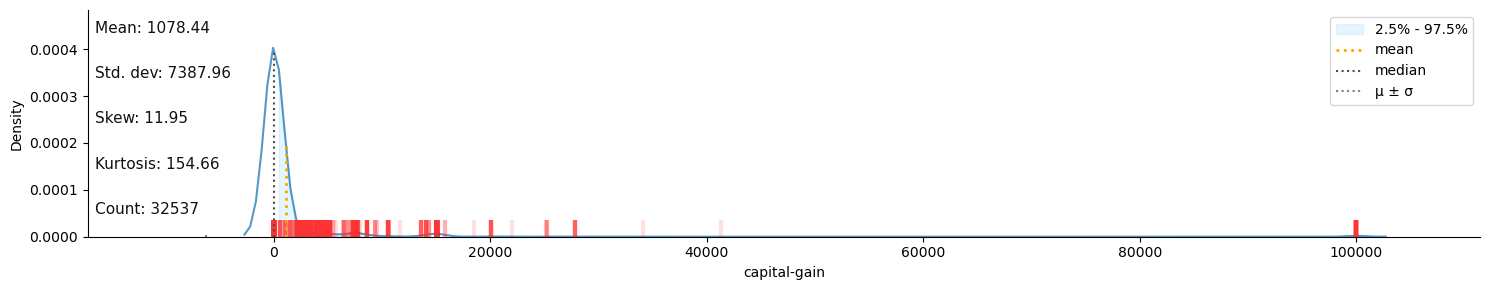

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


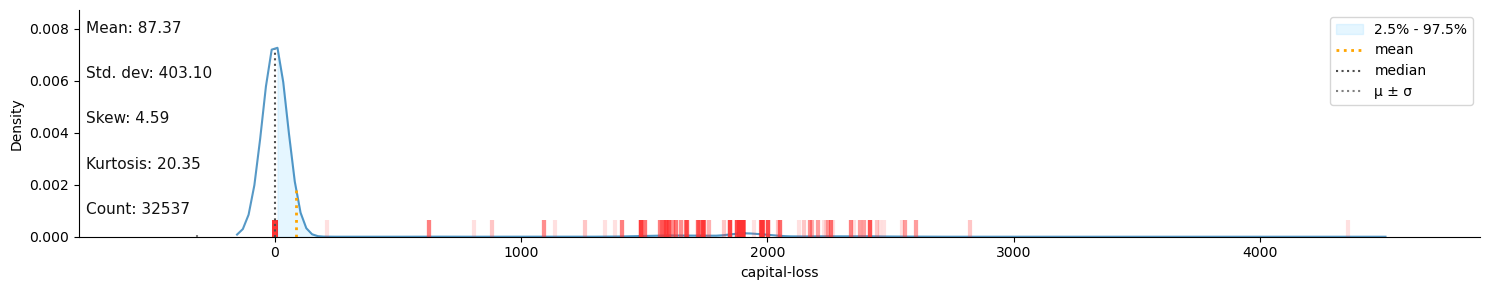

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


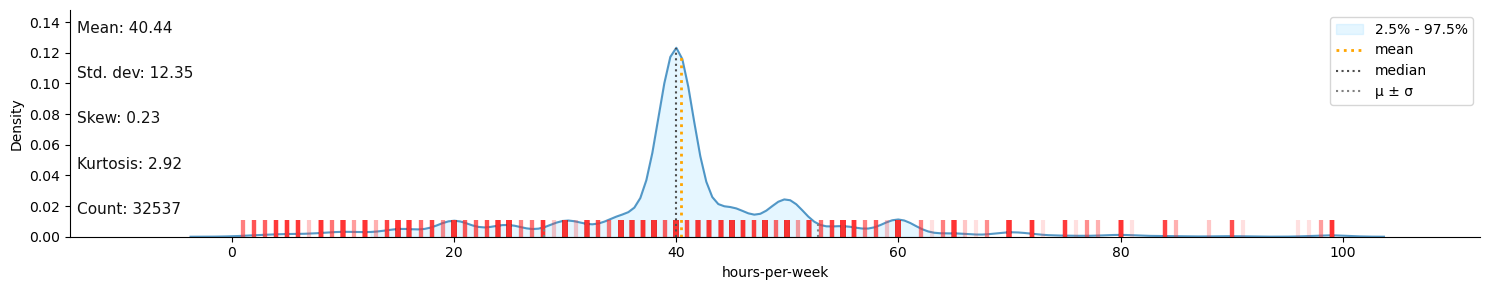

In [15]:
for i in data.columns:
    if data[i].dtype!='object':
        k.dist_plot(data=data[i])
        plt.show()

GridSpec(6, 9)

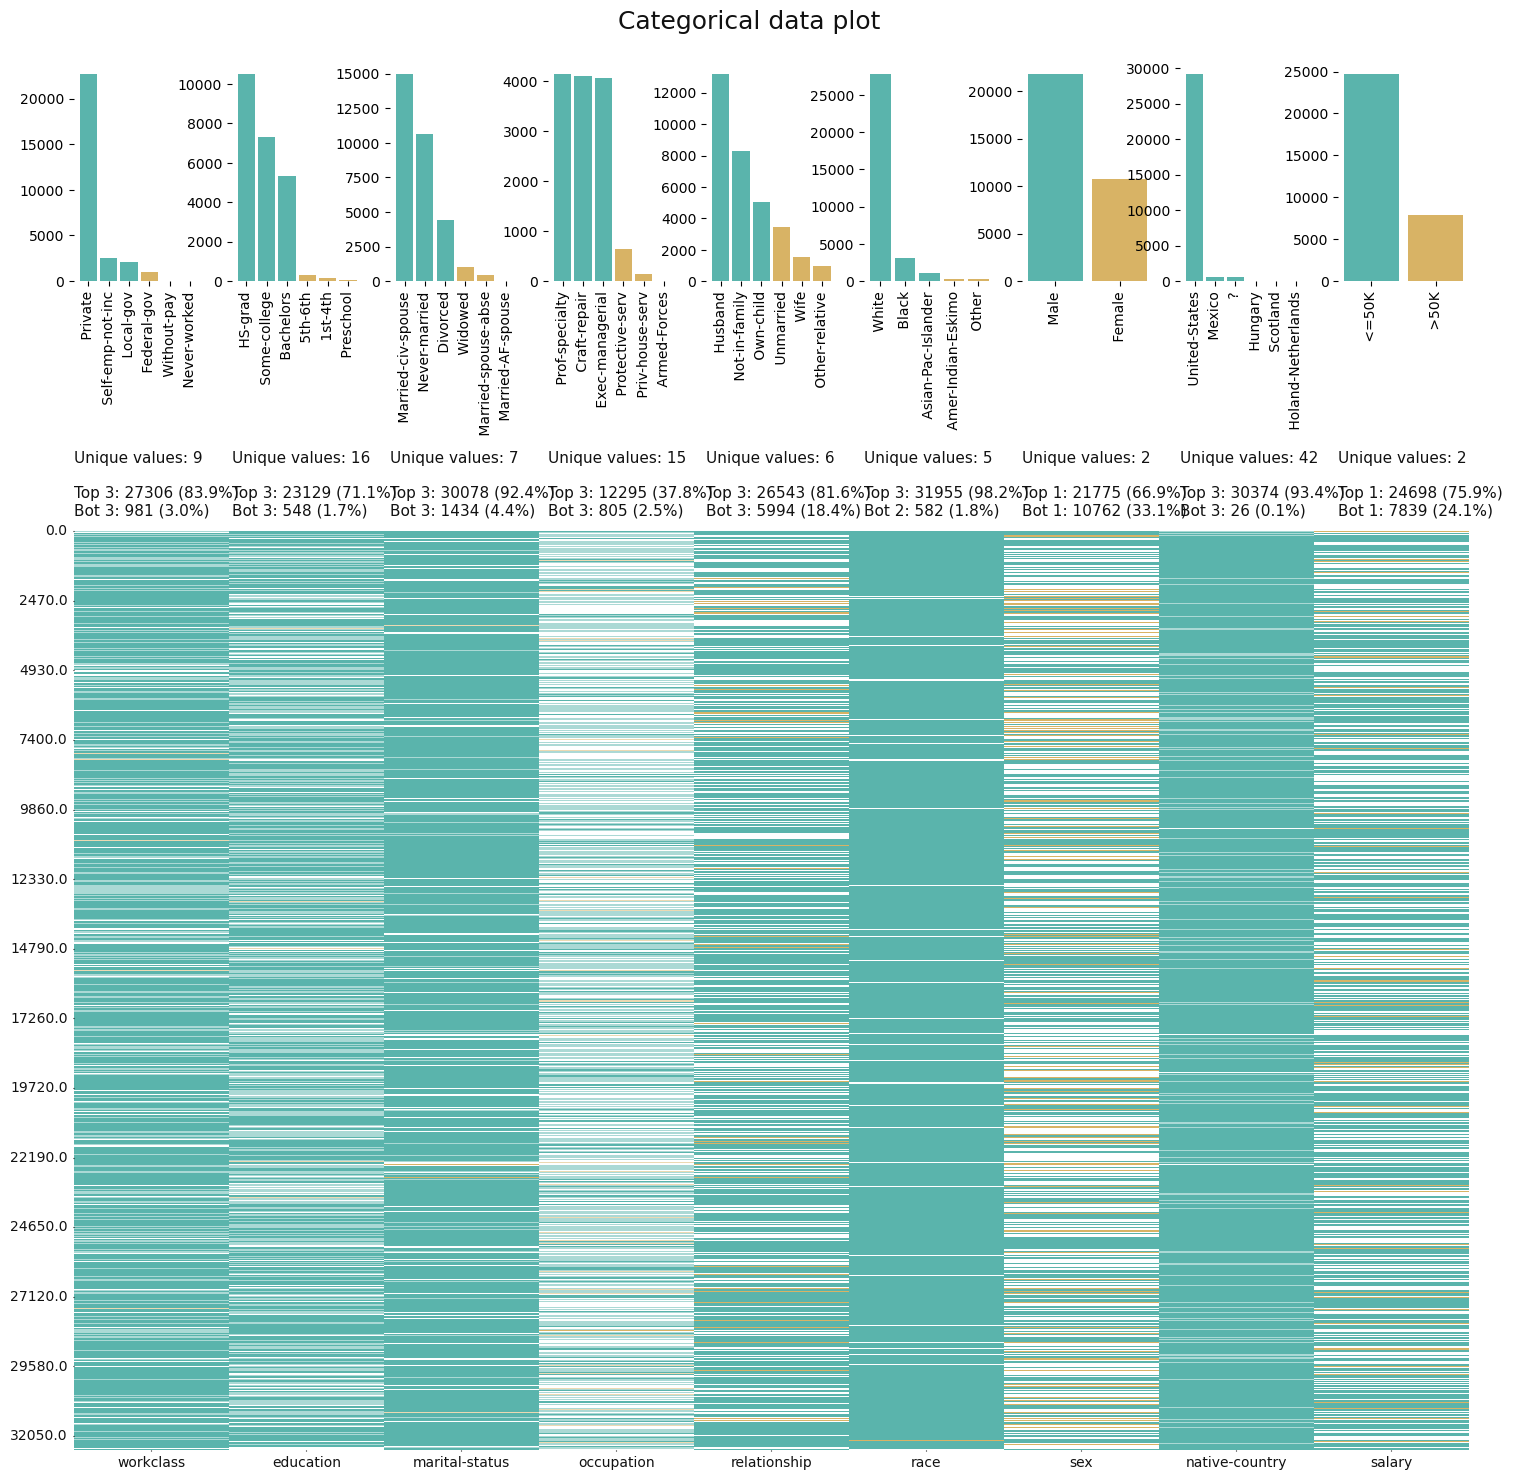

In [16]:
k.cat_plot(data)

## Label encoding

In [17]:
le=LabelEncoder()
for i in data.columns:
    if data[i].dtype=="object":
        data[i]=le.fit_transform(data[i])

In [19]:
data

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,7,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,9,13,2,10,5,2,0,0,0,40,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,7,12,2,13,5,4,0,0,0,38,39,0
32557,40,4,11,9,2,7,0,4,1,0,0,40,39,1
32558,58,4,11,9,6,1,4,4,0,0,0,40,39,0
32559,22,4,11,9,4,1,3,4,1,0,0,20,39,0


## Checking correlation

<AxesSubplot:>

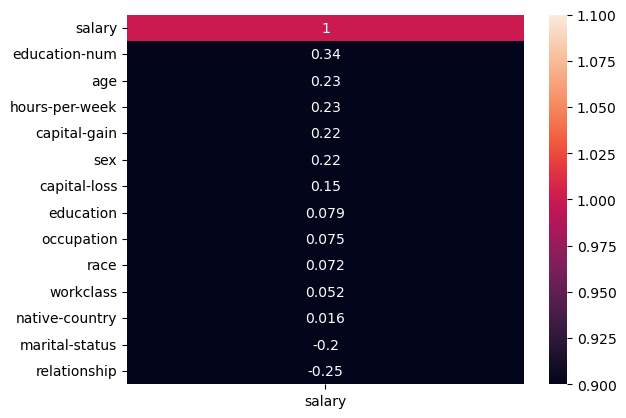

In [23]:
sns.heatmap(data.corr()[['salary']].sort_values(by='salary',ascending=False),vmin=1,vmax=1,annot=True)

## Scaling

In [24]:
sc=StandardScaler()

In [43]:
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [44]:
x=sc.fit_transform(x)

#### splitting the data into testing and training

In [45]:
x_test,x_train,y_test,y_train=train_test_split(x,y,test_size=0.5,random_state=0)

### model preperation


In [46]:
models = {
    "LogisticRegression" : LogisticRegression(),
    "DecisionTreeClassifier" : DecisionTreeClassifier(),
    "RandomForestClassifier" : RandomForestClassifier(),
    "KNeighborsClassifier"   : KNeighborsClassifier(),
    "GradientBoostingClassifier":GradientBoostingClassifier()
}

In [47]:
for name, model in models.items():
    scores = cross_val_score(model, x,y, cv=20,n_jobs=-1)
    print("cross validation model : {}".format(name))
    average_score = np.mean(scores)*100
    print("AVERAGE SCORE: ",average_score)
    print("*"*100)

cross validation model : LogisticRegression
AVERAGE SCORE:  82.47536195398831
****************************************************************************************************
cross validation model : DecisionTreeClassifier
AVERAGE SCORE:  81.53489394451412
****************************************************************************************************
cross validation model : RandomForestClassifier
AVERAGE SCORE:  85.07546771841413
****************************************************************************************************
cross validation model : KNeighborsClassifier
AVERAGE SCORE:  82.95479837097079
****************************************************************************************************
cross validation model : GradientBoostingClassifier
AVERAGE SCORE:  86.52918236312048
****************************************************************************************************


In [48]:
### highest scre is gradientbooster classification,so we proceed with that model

In [58]:
model=GradientBoostingClassifier()

In [56]:
model.fit(x_train, y_train)
print("model trained with {}".format(model))
score_train =accuracy_score (y_train, model.predict(x_train))
score_tst = accuracy_score(y_test, model.predict(x_test))
con_train = confusion_matrix(y_train, model.predict(x_train))
con_test = confusion_matrix(y_test, model.predict(x_test))
print("Model accuracy on train is:: ",score_train)
print("Model accuracy on test is:: ", score_tst)
print("confusion_matrix train is:: ", con_train)
print("confusion_matrix test is:: ", con_test)
print("Wrong Predictions made:",(y_test !=model.predict(x_test)).sum(),'/',((y_test == model.predict(x_test)).sum()+(y_test != model.predict(x_test)).sum()))

model trained with GradientBoostingClassifier(random_state=40)
Model accuracy on train is::  0.87270268609011
Model accuracy on test is::  0.8610154905335629
confusion_matrix train is::  [[11784   570]
 [ 1501  2414]]
confusion_matrix test is::  [[11715   629]
 [ 1632  2292]]
Wrong Predictions made: 2261 / 16268


## ROC curve

Model used is::  GradientBoostingClassifier()


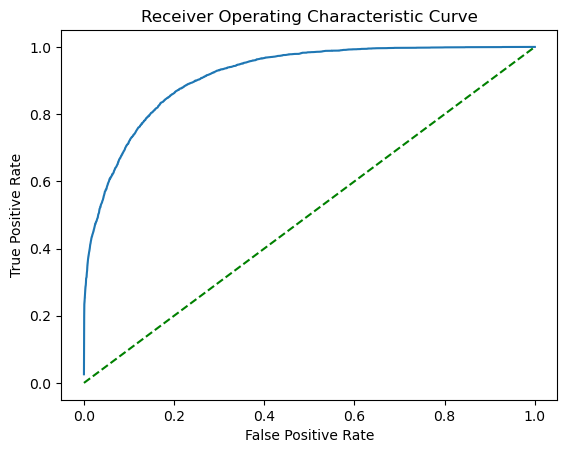

In [60]:
model.fit(x_train, y_train)
probs = model.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
print("Model used is:: ",model)
sns.lineplot(x= fpr, y=tpr)
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.show()